## Proyecto 3. Entrega 3
### Regresion Lineal
Diego Duarte 22075 - José Marchena 22398 - Andrés Kou 22305 - Esteban Zambrano 22119

#### Importaciones


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

from pipeline import crear_pipeline_knn          
from error_metrics import calculate_errors, diff_analysis

#### Carga y preparación de datos

In [ ]:
# Cargar dataset
df = pd.read_csv("../DataFinal.csv")

# Columnas categóricas
categoricas = ['Grupo de Edad', 'Año']
df[categoricas] = df[categoricas].astype(str)        

# Eliminar filas sin valor objetivo
df = df[df['Total Nacimientos'].notna()]

#### Variables (X / y) y One-Hot Encoding

In [4]:
y = df['Total Nacimientos']
X = df.drop(columns=['Total Nacimientos'])

X = pd.get_dummies(X, columns=categoricas, drop_first=True) 

#### División train / test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### Creación y entrenamiento del pipeline (KNN básico)

In [6]:
modelo_knn = KNeighborsRegressor(n_neighbors=5, weights='distance', p=2)
pipeline = crear_pipeline_knn(modelo_knn)

pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', KNeighborsRegressor(weights='distance'))])

#### Evaluación del modelo (básico)

KNN básico:
MAE: 2701.696572228741
MSE: 16877291.49722138
RMSE: 4108.19808398054
R²: 0.9859665361391375


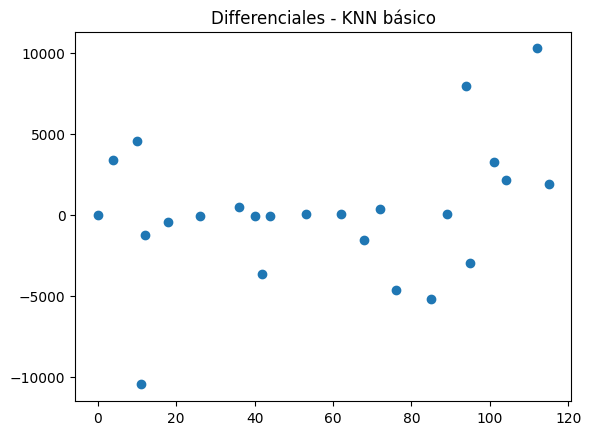

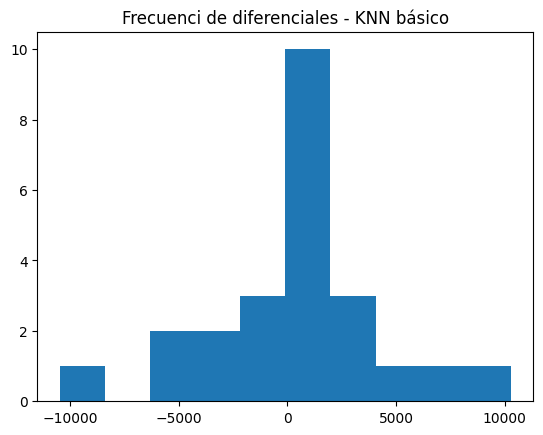

In [8]:
from error_metrics import calculate_errors, diff_analysis

y_pred = pipeline.predict(X_test)

calculate_errors(y_pred, y_test, "KNN básico")
diff_analysis(y_pred, y_test, "KNN básico")